# Data Visualization
* Python packages for generating plots
    * Matplotlib: most prominent package
    * Seaborn: to visualize data frames
    
## 1. Use

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the dataset directly from the website

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# To find out more about the categories in ocean_proximity
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## 3. Distribution of the features
### 3.1. Describe the distribution

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 3.2. Histograms

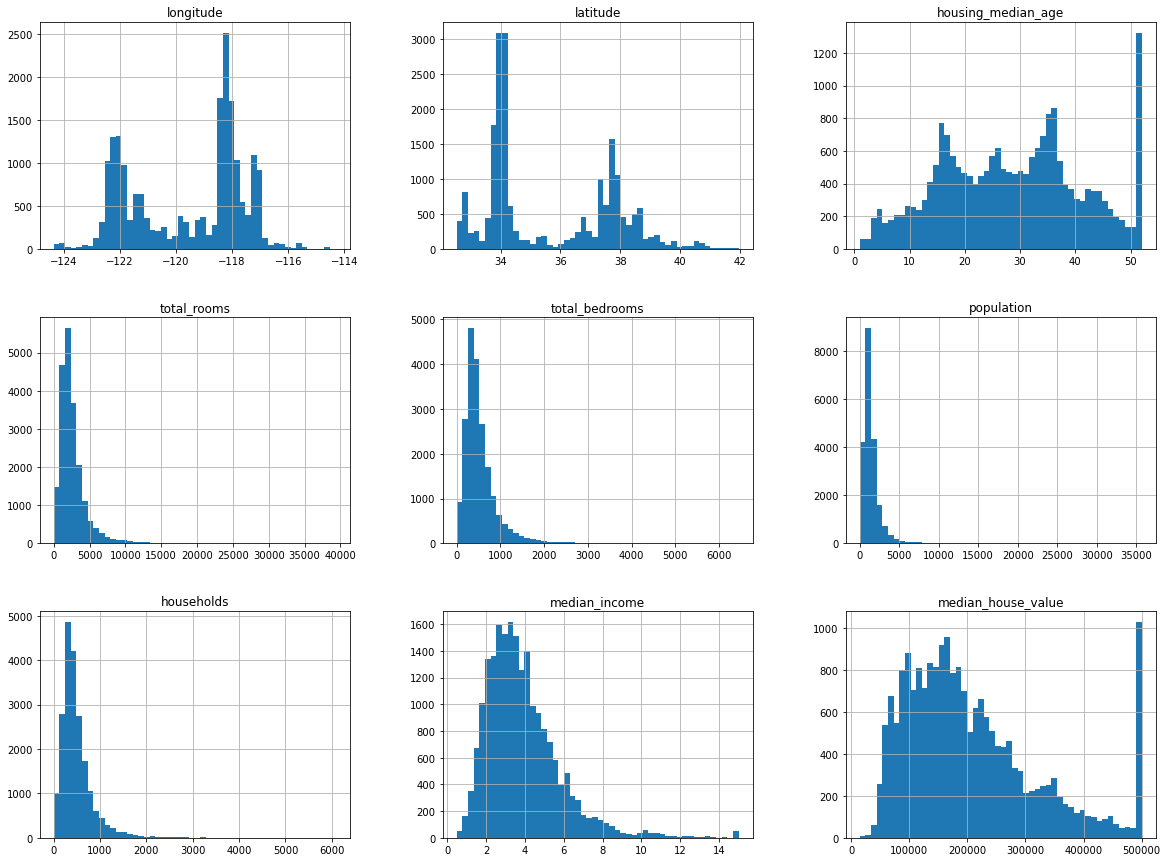

In [9]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

### 3.3. Histogram with categories

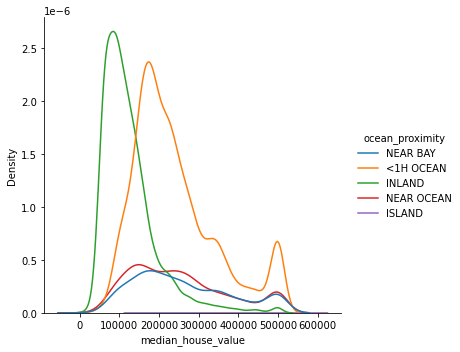

In [10]:
sns.displot(housing, x = 'median_house_value', hue = 'ocean_proximity', kind = 'kde')
plt.show()

## 4. Correlation
### 4.1. Describe the correlations

In [11]:
correlationMatrix = housing.corr()
correlationMatrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


### 4.2. Visualize the correlation values

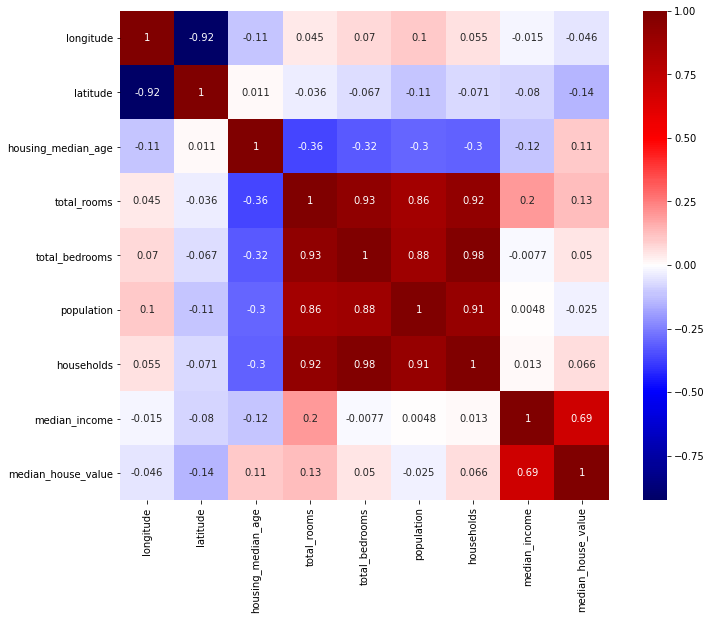

In [12]:
plt.figure(figsize = (12, 9))
sns.heatmap(correlationMatrix, square = True, annot = True, center = 0, cmap = 'seismic')
plt.show()

### 4.3. Visualize the correlations using scatter plots

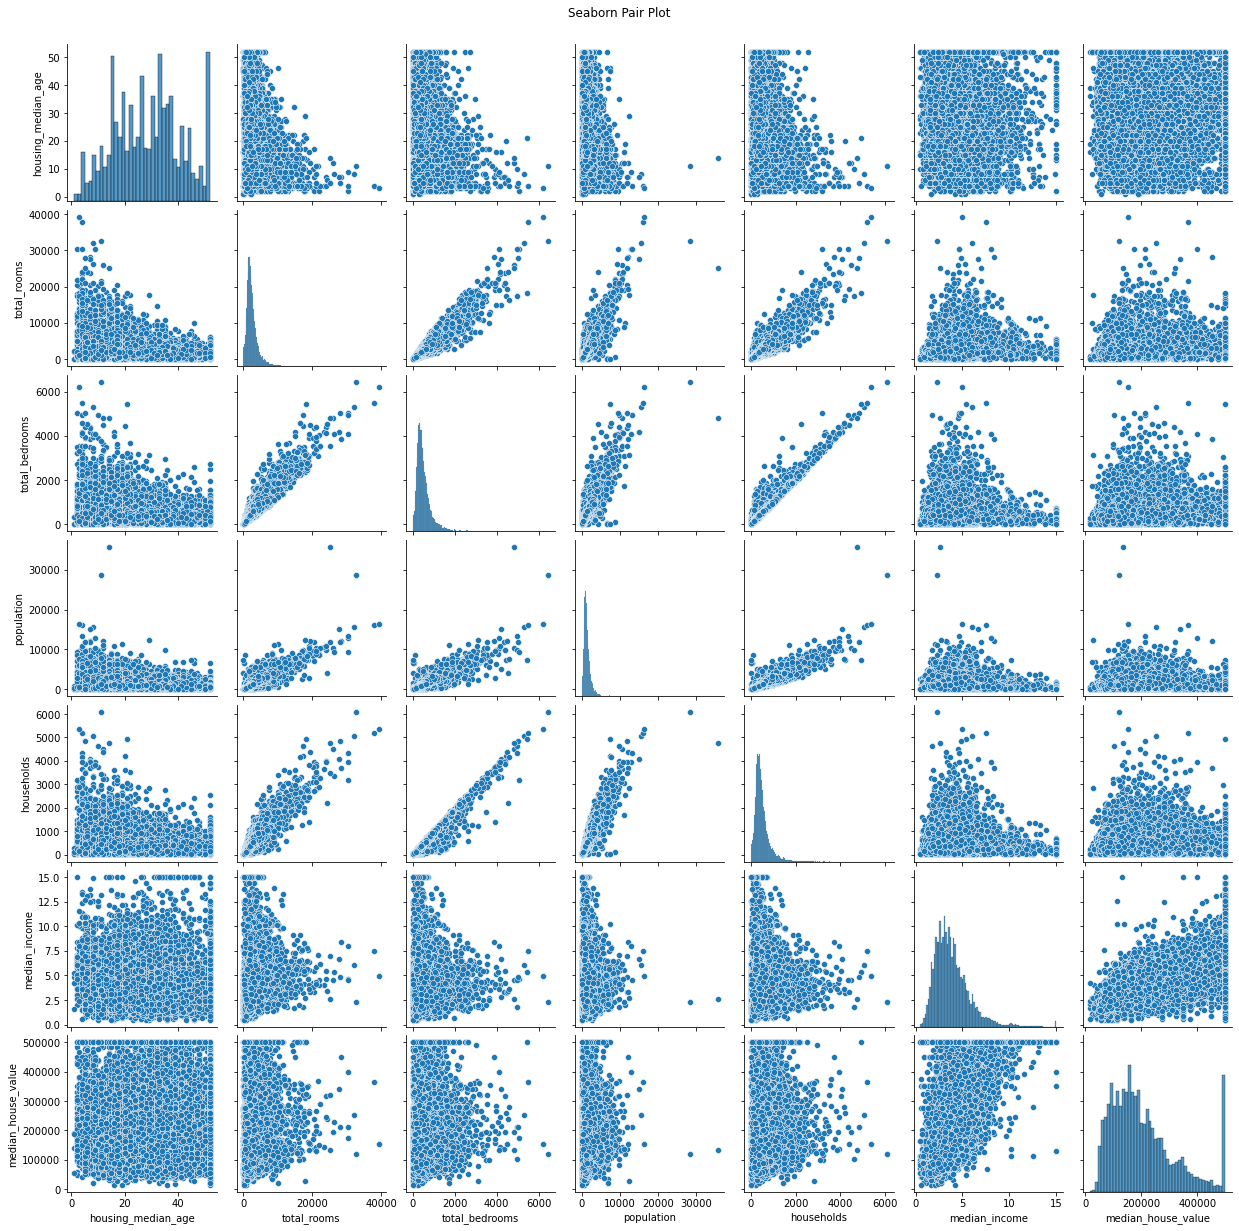

In [13]:
plot = sns.pairplot(housing, x_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'],
                    y_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'])
plot.fig.suptitle('Seaborn Pair Plot')
plot.fig.subplots_adjust(top = 0.95)

## 5. Scatter plots
### 5.1. Simple scatter plot

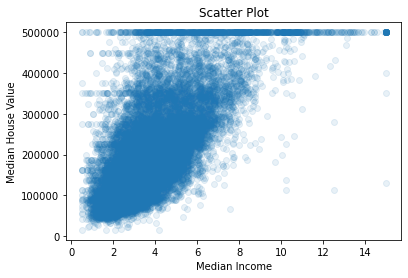

In [14]:
plt.scatter(housing['median_income'], housing['median_house_value'], alpha = 0.1)
plt.title('Scatter Plot')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.savefig("scatterPlot.jpg")
plt.show()

### 5.2. Scatter plot with categories

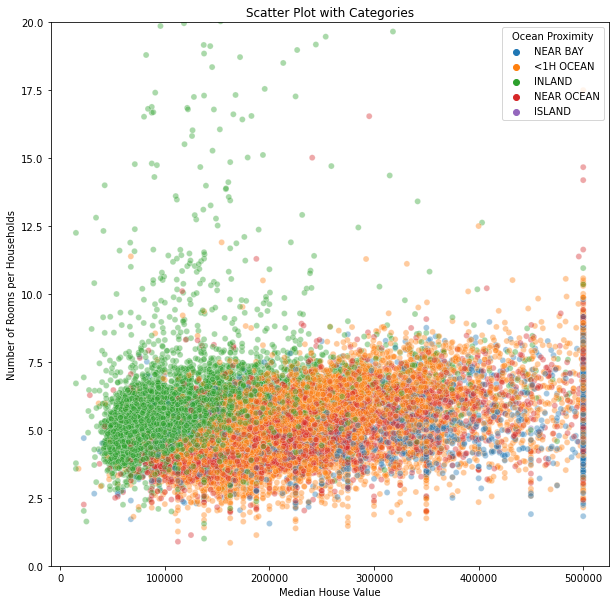

In [15]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = housing, 
                     x = 'median_house_value', y = 'rooms_per_household', hue = 'ocean_proximity', 
                     alpha = 0.4)
plt.legend(title='Ocean Proximity')
plt.title('Scatter Plot with Categories')
plt.xlabel('Median House Value')
plt.ylabel('Number of Rooms per Households')
plt.ylim(0,20)
plt.show()

## 6. Visualize geographical data
### 6.1. Simple map scatter plot

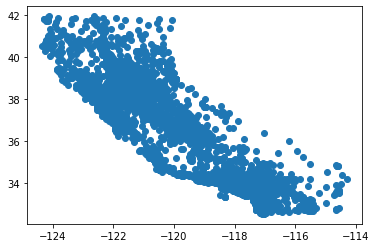

In [16]:
plt.scatter(housing["longitude"], housing["latitude"], alpha = 1.0)
plt.show()

### 6.2. Map scatter plot with size and color information

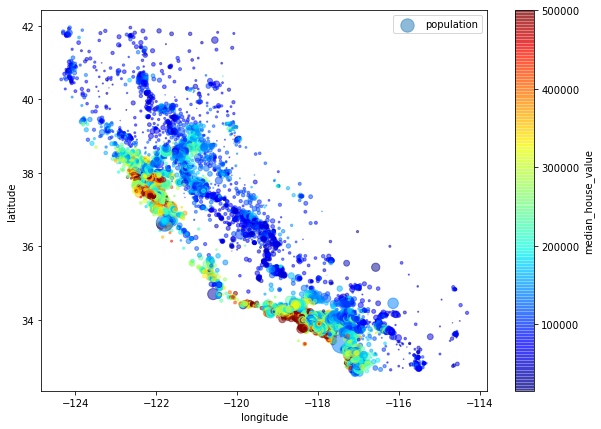

In [17]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.5,
             s = housing["population"]/100, label = "population", figsize = (10,7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), 
             colorbar = True, sharex = False)
plt.legend()
plt.show()

### 6.3. Map scatter plot with categories 

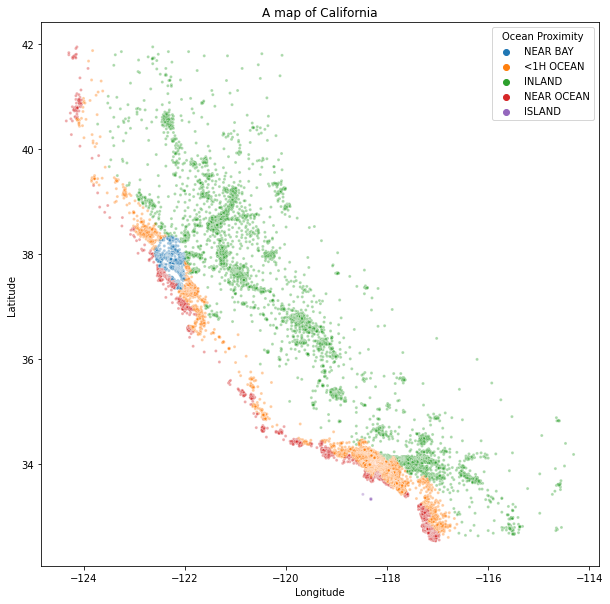

In [18]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = housing, 
                     x = 'longitude', y = 'latitude', hue = 'ocean_proximity', 
                     alpha = 0.4, marker = '.')
plt.legend(title = 'Ocean Proximity')
plt.title('A map of California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 7. Box plots

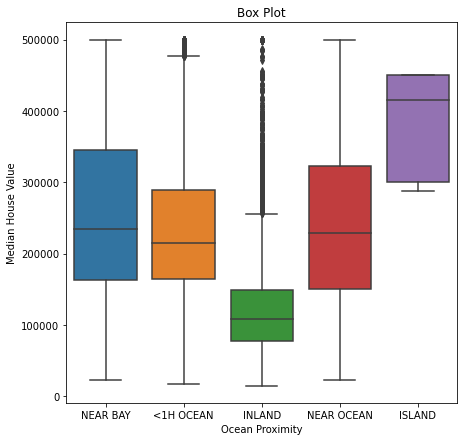

In [19]:
plt.figure(figsize = (7,7))
sns.boxplot(x = housing['ocean_proximity'], y = housing['median_house_value'])
plt.title('Box Plot')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

## 8. Subplots

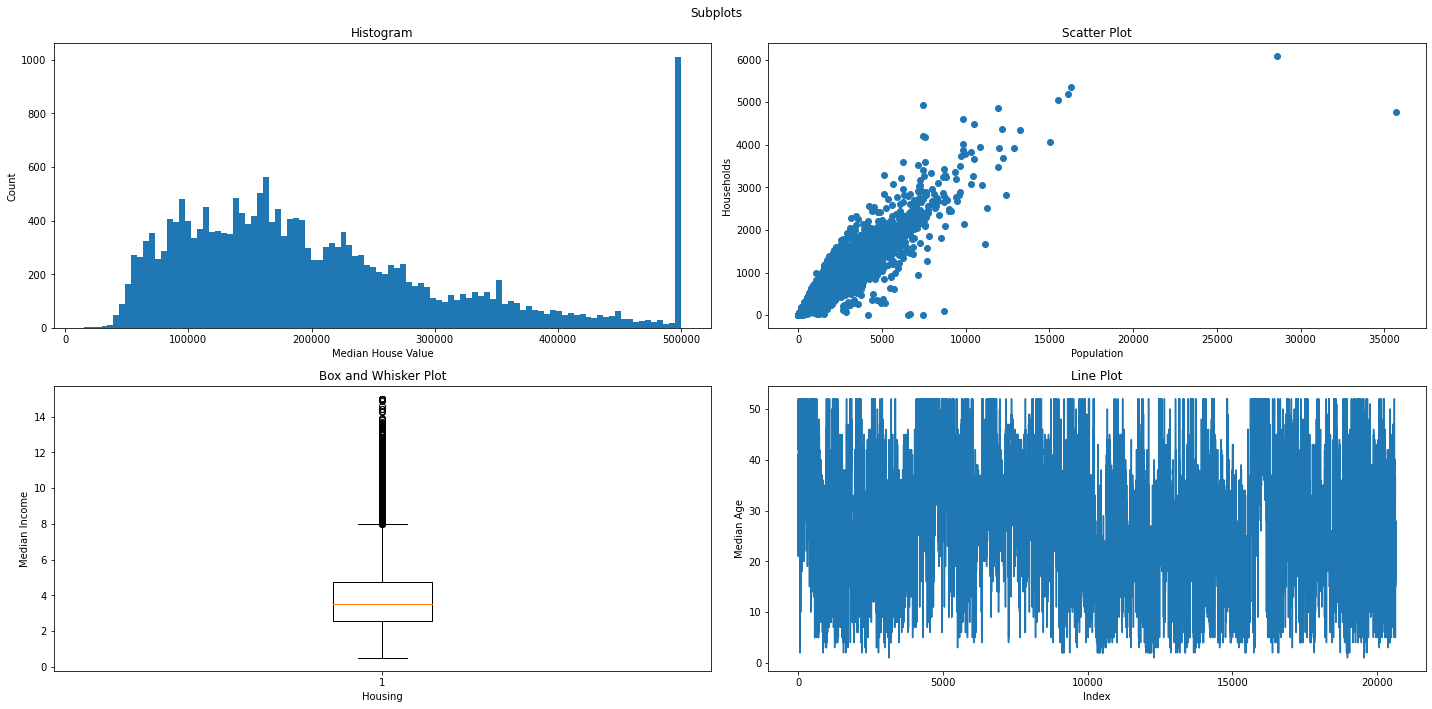

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (20,10))
ax[0,0].hist(housing['median_house_value'], bins = 100)
ax[0,0].set_title('Histogram')
ax[0,0].set_xlabel('Median House Value')
ax[0,0].set_ylabel('Count')
ax[0,1].scatter(housing['population'], housing['households'])
ax[0,1].set_title('Scatter Plot')
ax[0,1].set_xlabel('Population')
ax[0,1].set_ylabel('Households')
ax[1,0].boxplot(housing['median_income'])
ax[1,0].set_title('Box and Whisker Plot')
ax[1,0].set_xlabel('Housing')
ax[1,0].set_ylabel('Median Income')
ax[1,1].plot(housing.index.values, housing['housing_median_age'])
ax[1,1].set_title('Line Plot')
ax[1,1].set_xlabel('Index')
ax[1,1].set_ylabel('Median Age')
fig.suptitle('Subplots')
fig.tight_layout()
plt.show()